In [1]:
# module 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
plt.rcParams["figure.figsize"] = (14,8)

In [3]:
def plot_feature_importances(model, feature):
    n_features = len(feature)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature)
    plt.xlabel("feature importances")
    plt.ylabel("feature index")
    plt.ylim(-1, n_features)

In [4]:
# dataset 로딩
x_load = pd.read_csv('C:\\Users\\zeus_\\Desktop\\champion_data\\train\\train_data.csv').sort_values(by='acc_id', ascending=True)
y_load = pd.read_csv('C:\\Users\\zeus_\\Desktop\\champion_data\\train\\train_label.csv').sort_values(by='acc_id', ascending=True)['label']

In [5]:
x_data = x_load#.drop(["Unnamed: 0"], axis=1)
y_data = y_load

In [6]:
x_data = x_data.drop(['acc_id'], axis=1)

# 트레이닝셋, 테스트 셋 구분
---

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=200)

---
# 모델 - 전체
---

In [65]:
forest = RandomForestClassifier(n_estimators=500, random_state=24, n_jobs=-1, max_depth=32)

In [66]:
forest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=32, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=24, verbose=0, warm_start=False)

In [67]:
print("테스트 세트 정확도: {:.3f}".format(forest.score(x_test, y_test)))

테스트 세트 정확도: 0.742


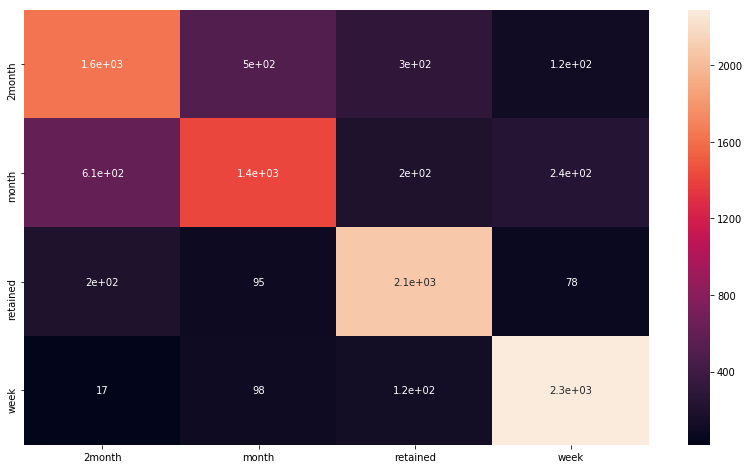

In [68]:
cm = pd.DataFrame(confusion_matrix(y_test, forest.predict(x_test)), columns=forest.classes_, index=forest.classes_)
sns.heatmap(cm, annot=True)

In [69]:
print(classification_report(y_test, forest.predict(x_test)))

             precision    recall  f1-score   support

     2month       0.66      0.64      0.65      2551
      month       0.67      0.57      0.62      2466
   retained       0.77      0.85      0.81      2454
       week       0.84      0.91      0.87      2529

avg / total       0.74      0.74      0.74     10000



In [30]:
# plot_feature_importances(forest, x_test.columns)

---
# MODEL 1
---

In [70]:
y_data_layer1 = y_train.map(lambda value: "MON" if value == "month" or value == "2month" else value)

In [71]:
x_train_layer1, x_test_layer1, y_train_layer1, y_test_layer1 = train_test_split(x_train, y_data_layer1, test_size=0.1, random_state=1)

In [72]:
forest1 = RandomForestClassifier(n_estimators=500, random_state=0, n_jobs=-1, max_depth=32, criterion='entropy')

In [73]:
forest1.fit(x_train_layer1, y_train_layer1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=32, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [74]:
print("테스트 세트 정확도: {:.3f}".format(forest1.score(x_test_layer1, y_test_layer1)))

테스트 세트 정확도: 0.852


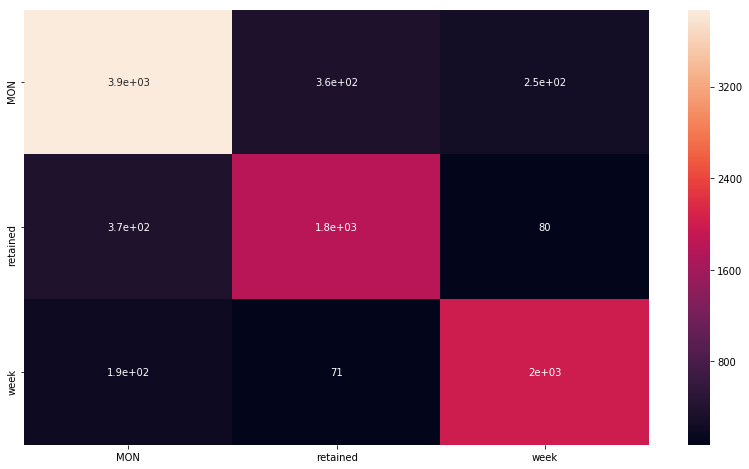

In [37]:
cm = pd.DataFrame(confusion_matrix(y_test_layer1, forest1.predict(x_test_layer1)), columns=forest1.classes_, index=forest1.classes_)
sns.heatmap(cm, annot=True)

In [38]:
print(classification_report(y_test_layer1, forest1.predict(x_test_layer1)))

             precision    recall  f1-score   support

        MON       0.87      0.86      0.87      4487
   retained       0.81      0.80      0.80      2251
       week       0.86      0.88      0.87      2262

avg / total       0.85      0.85      0.85      9000



In [39]:
# plot_feature_importances(forest1, x_test_layer1.columns)

# MODEL 2

In [75]:
custom_filter = [v[0] or v[1] for v in zip(list((y_train == 'month').values), list((y_train == '2month').values))]
x_data_layer2 = x_train[custom_filter]
y_data_layer2 = y_train[custom_filter]

In [76]:
x_train_layer2, x_test_layer2, y_train_layer2, y_test_layer2 = train_test_split(x_data_layer2, y_data_layer2, test_size=0.1, random_state=1)

In [121]:
forest2 = RandomForestClassifier(n_estimators=100, random_state=1, n_jobs=-1, max_depth=26, min_samples_split=10)

In [122]:
forest2.fit(x_train_layer2, y_train_layer2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=26, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [123]:
print("테스트 세트 정확도: {:.3f}".format(forest2.score(x_test_layer2, y_test_layer2)))

테스트 세트 정확도: 0.735


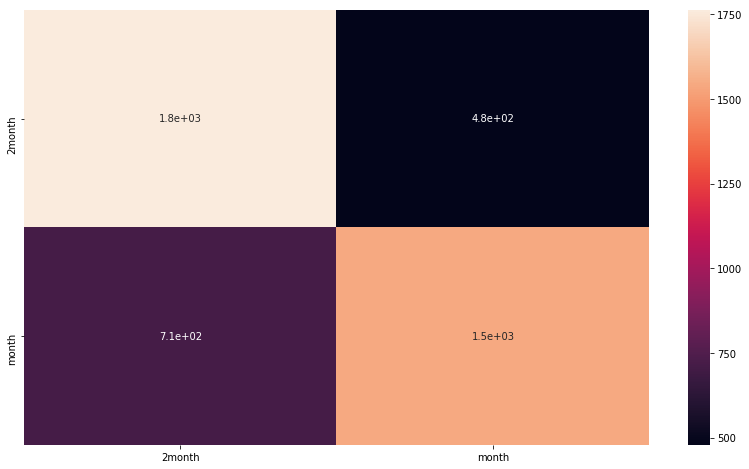

In [124]:
cm = pd.DataFrame(confusion_matrix(y_test_layer2, forest2.predict(x_test_layer2)), columns=forest2.classes_, index=forest2.classes_)
sns.heatmap(cm, annot=True)

In [125]:
print(classification_report(y_test_layer2, forest2.predict(x_test_layer2)))

             precision    recall  f1-score   support

     2month       0.71      0.79      0.75      2242
      month       0.76      0.68      0.72      2257

avg / total       0.74      0.73      0.73      4499



In [126]:
print(classification_report(y_train_layer2, forest2.predict(x_train_layer2)))

             precision    recall  f1-score   support

     2month       0.79      0.87      0.83     20207
      month       0.85      0.77      0.81     20277

avg / total       0.82      0.82      0.82     40484



# 더미 테스트
---

In [48]:
result = forest1.predict(x_test)

In [49]:
result[np.where(result == 'MON')[0]] = forest2.predict(x_test.iloc[np.where(result == 'MON')[0]])

In [50]:
print(classification_report(y_test, result))

             precision    recall  f1-score   support

     2month       0.65      0.61      0.63      2551
      month       0.62      0.62      0.62      2466
   retained       0.79      0.82      0.80      2454
       week       0.86      0.88      0.87      2529

avg / total       0.73      0.73      0.73     10000



# 테스트
---

### model 1

In [51]:
# 테스트 데이터 로드
test_data = pd.read_csv('C:\\Users\\zeus_\\Desktop\\champion_data\\test\\test_data.csv')

In [52]:
acc_id = test_data.acc_id.values

In [53]:
x_test = test_data.drop(['acc_id'], axis=1)

In [54]:
result = forest.predict(x_test)

In [55]:
data = {'acc_id':acc_id, 'label':result}

In [56]:
df = pd.DataFrame(data)

In [57]:
df.to_csv('C:\\Users\\zeus_\\Desktop\\champion_data\\test\\result\\33_3_result.csv')

### model 2

In [30]:
# 테스트 데이터 로드
test_data = pd.read_csv('C:\\Users\\zeus_\\Desktop\\champion_data\\test\\test_data.csv')

In [31]:
acc_id = test_data.acc_id.values

In [32]:
x_test = test_data.drop(['acc_id'], axis=1)

In [33]:
result = forest1.predict(x_test)

In [34]:
result[np.where(result == 'MON')[0]] = forest2.predict(x_test.iloc[np.where(result == 'MON')[0]])

In [35]:
data = {'acc_id':acc_id, 'label':result}

In [36]:
df = pd.DataFrame(data)

In [37]:
df.to_csv('C:\\Users\\zeus_\\Desktop\\champion_data\\test\\result\\33_3_result.csv')